## 0.0 Imports

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import inflection
import matplotlib.pyplot as plt
from IPython.core.display import HTML

### 0.1 Helper Functions

In [85]:
def jupyter_settings(): 
    %matplotlib inline 
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [24, 20]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option( 'display.expand_frame_repr', False ) 
    sns.set()

### 0.2 Loading Data

In [79]:
df_store_raw = pd.read_csv('data/train.csv', low_memory=False)
df_features_raw = pd.read_csv('data/stores.csv', low_memory=False)

#merge
df_raw = pd.merge(df_store_raw, df_features_raw, on='Store', how='left')

In [61]:
df_raw.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
339605,35,92,2012-03-30,28355.02,False,B,103681


## 1.0 Descrição Dos Dados

In [62]:
df1 = df_raw.copy()

In [63]:
df1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

### 1.1 Rename Columns

In [64]:
cols_old = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map (snakecase, cols_old))

#rename
df1.columns = cols_new

In [65]:
df1.sample()

,store,dept,date,weekly_sales,is_holiday,type,size
207756,22,5,2011-02-11,24374.69,True,B,119557


### 1.2 Data Dimensions

In [66]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 421570
Number of Cols: 7


### 1.3 Data Types

In [67]:
df1.dtypes

store             int64
dept              int64
date             object
weekly_sales    float64
is_holiday         bool
type             object
size              int64
dtype: object

### 1.4 Check NA

In [68]:
df1.isna().sum()

store           0
dept            0
date            0
weekly_sales    0
is_holiday      0
type            0
size            0
dtype: int64

### Fillout Na

### 1.6 Change Types

In [69]:
df1.dtypes

store             int64
dept              int64
date             object
weekly_sales    float64
is_holiday         bool
type             object
size              int64
dtype: object

In [70]:
df1['date'] = pd.to_datetime(df1['date'])

In [71]:
df1.dtypes

store                    int64
dept                     int64
date            datetime64[ns]
weekly_sales           float64
is_holiday                bool
type                    object
size                     int64
dtype: object

### 1.7 Descriptive Statistical

In [72]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1 Numerical Attributes

In [73]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.00,45.00,44.0,22.200546,22.00,12.785282,0.077763,-1.146503
1,dept,1.00,99.00,98.0,44.260317,37.00,30.492018,0.358223,-1.215571
2,weekly_sales,-4988.94,693099.36,698088.3,15981.258123,7612.03,22711.156583,3.262008,21.491290
3,size,34875.00,219622.00,184747.0,136727.915739,140167.00,60980.511002,-0.325850,-1.206346


<AxesSubplot:xlabel='weekly_sales'>

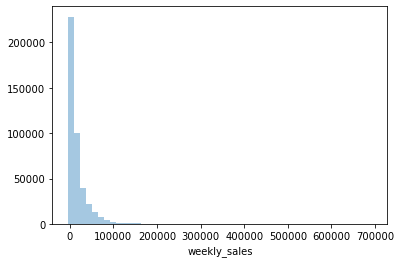

In [86]:
sns.distplot( df1['weekly_sales'], kde=False )

### 1.7.2 Categorical Attributes

In [75]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

is_holiday    2
type          3
dtype: int64

<AxesSubplot:xlabel='type', ylabel='weekly_sales'>

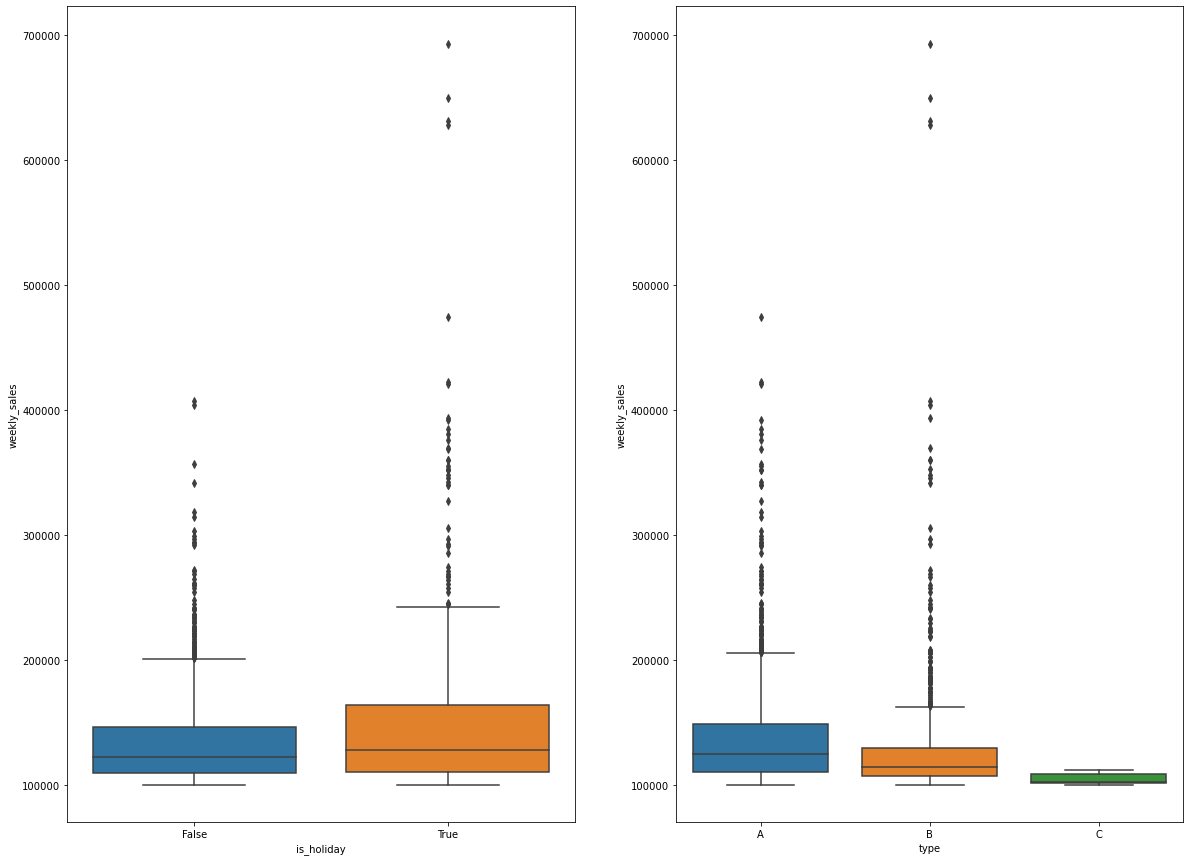

In [94]:
plt.figure(figsize=(20,15))
aux1 = df1[(df1['is_holiday'] != '0') & (df1['weekly_sales'] > 100000)]

plt.subplot( 1, 2, 1 )
sns.boxplot( x='is_holiday', y='weekly_sales', data=aux1 ) 

plt.subplot( 1, 2, 2 )
sns.boxplot( x='type', y='weekly_sales', data=aux1 )

## 2.0 Feature Engineering

In [ ]:
Image('img/')

###  2.1 Mapa mental de Hipoteses

### 2.2 Feature Engineering
Agente 1

### 2.3 Filtrando Variaveis

## 3.0 Analise Exploratória de Dados

### 3.1 Analise Univariada

### 3.2 Analise Bivariada